In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')

In [3]:
train.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [4]:
### CHoosing the Top 10 Features based on the co-relation with the depende
from statsmodels.stats.outliers_influence import variance_inflation_factor
corr_value = train.corr()
corr_value

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/3225634449.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_value = train.corr()


,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,1.000000,-0.005338,-0.002396,0.004419,-0.001968,-0.001790,0.001500,-0.000475,-0.000680,0.003275,0.002114,0.000175
Air temperature [K],-0.005338,1.000000,0.856080,0.016545,-0.006773,0.016994,0.067744,0.003826,0.100454,0.007967,0.007842,0.004815
Process temperature [K],-0.002396,0.856080,1.000000,0.011263,-0.006298,0.012777,0.030966,0.004459,0.041454,0.003871,0.005337,0.004399
Rotational speed [rpm],0.004419,0.016545,0.011263,1.000000,-0.779394,0.003983,-0.060868,-0.005765,-0.081996,0.053948,-0.061376,-0.003410
Torque [Nm],-0.001968,-0.006773,-0.006298,-0.779394,1.000000,-0.003148,0.145793,0.012983,0.100773,0.050289,0.108765,0.007986
Tool wear [min],-0.001790,0.016994,0.012777,0.003983,-0.003148,1.000000,0.056448,0.046470,0.011709,0.007624,0.063604,-0.002071
Machine failure,0.001500,0.067744,0.030966,-0.060868,0.145793,0.056448,1.000000,0.311919,0.564507,0.383941,0.494668,0.001428
TWF,-0.000475,0.003826,0.004459,-0.005765,0.012983,0.046470,0.311919,1.000000,0.010145,0.039927,0.036041,0.002044
HDF,-0.000680,0.100454,0.041454,-0.081996,0.100773,0.011709,0.564507,0.010145,1.000000,0.046680,0.067149,0.000885
PWF,0.003275,0.007967,0.003871,0.053948,0.050289,0.007624,0.383941,0.039927,0.046680,1.000000,0.090016,0.000827


In [5]:
train.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [6]:
test.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

                   feature           VIF
0                      TWF      1.004317
1                      HDF      1.038500
2                      PWF      1.015045
3                      OSF      1.027343
4              Torque [Nm]     24.043146
5      Air temperature [K]  92404.788133
6  Process temperature [K]  92489.291817
7                      RNF      1.002343
Accuracy: 0.9962374786220376
[[20136    73]
 [    4   252]]


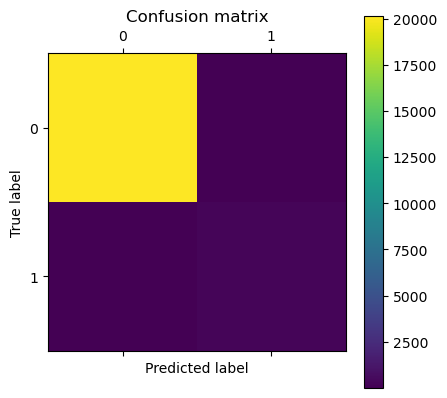

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt
df = train[['TWF','HDF','PWF','OSF','Torque [Nm]',
            'Air temperature [K]','Process temperature [K]','RNF']]
#x1 = x1.values
#print(x1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data) 

x1 = train[['TWF','HDF','PWF','OSF','Torque [Nm]',
            'Air temperature [K]','Process temperature [K]','RNF']]
y1 = train[['Machine failure']]

X_TEST = test[['TWF','HDF','PWF','OSF','Torque [Nm]',
            'Air temperature [K]','Process temperature [K]','RNF']]

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.15, random_state=1)

clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=10)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### predicitng actual values

Y_PRED = clf.predict(X_TEST)

submission = pd.DataFrame(Y_PRED)

submission.head()

submission.to_csv('/kaggle/working/submission.csv')





In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled_actual = scaler.transform(X_TEST)
X_test_scaled_actual

array([[-0.0395382 , -0.07138894, -0.04839841, ...,  1.31033138,
         1.12628667, -0.04758611],
       [-0.0395382 , -0.07138894, -0.04839841, ...,  0.98789252,
         0.76528809, -0.04758611],
       [-0.0395382 , -0.07138894, -0.04839841, ...,  0.77293329,
         0.3320898 , -0.04758611],
       ...,
       [-0.0395382 , -0.07138894, -0.04839841, ..., -2.2902358 ,
        -2.70029824, -0.04758611],
       [-0.0395382 , -0.07138894, -0.04839841, ..., -0.94674059,
        -1.54510279, -0.04758611],
       [-0.0395382 , -0.07138894, -0.04839841, ...,  1.95520908,
         2.06488297, -0.04758611]])

In [9]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
3624/3624 [==============================] - 12s 3ms/step - loss: 0.0280 - accuracy: 0.9957 - precision: 0.9683 - recall: 0.7532
Epoch 2/100
3624/3624 [==============================] - 11s 3ms/step - loss: 0.0238 - accuracy: 0.9961 - precision: 0.9928 - recall: 0.7603
Epoch 3/100
3624/3624 [==============================] - 11s 3ms/step - loss: 0.0235 - accuracy: 0.9962 - precision: 0.9936 - recall: 0.7614
Epoch 4/100
3624/3624 [==============================] - 11s 3ms/step - loss: 0.0233 - accuracy: 0.9962 - precision: 0.9928 - recall: 0.7614
Epoch 5/100
3624/3624 [==============================] - 11s 3ms/step - loss: 0.0234 - accuracy: 0.9961 - precision: 0.9907 - recall: 0.7592
Epoch 6/100
3624/3624 [==============================] - 11s 3ms/step - loss: 0.0232 - accuracy: 0.9962 - precision: 0.9921 - recall: 0.7614
Epoch 7/100
3624/3624 [==============================] - 11s 3ms/step - loss: 0.0233 - accuracy: 0.9962 - precision: 0.9936 - recall: 0.7614
Epoch 8/100
3

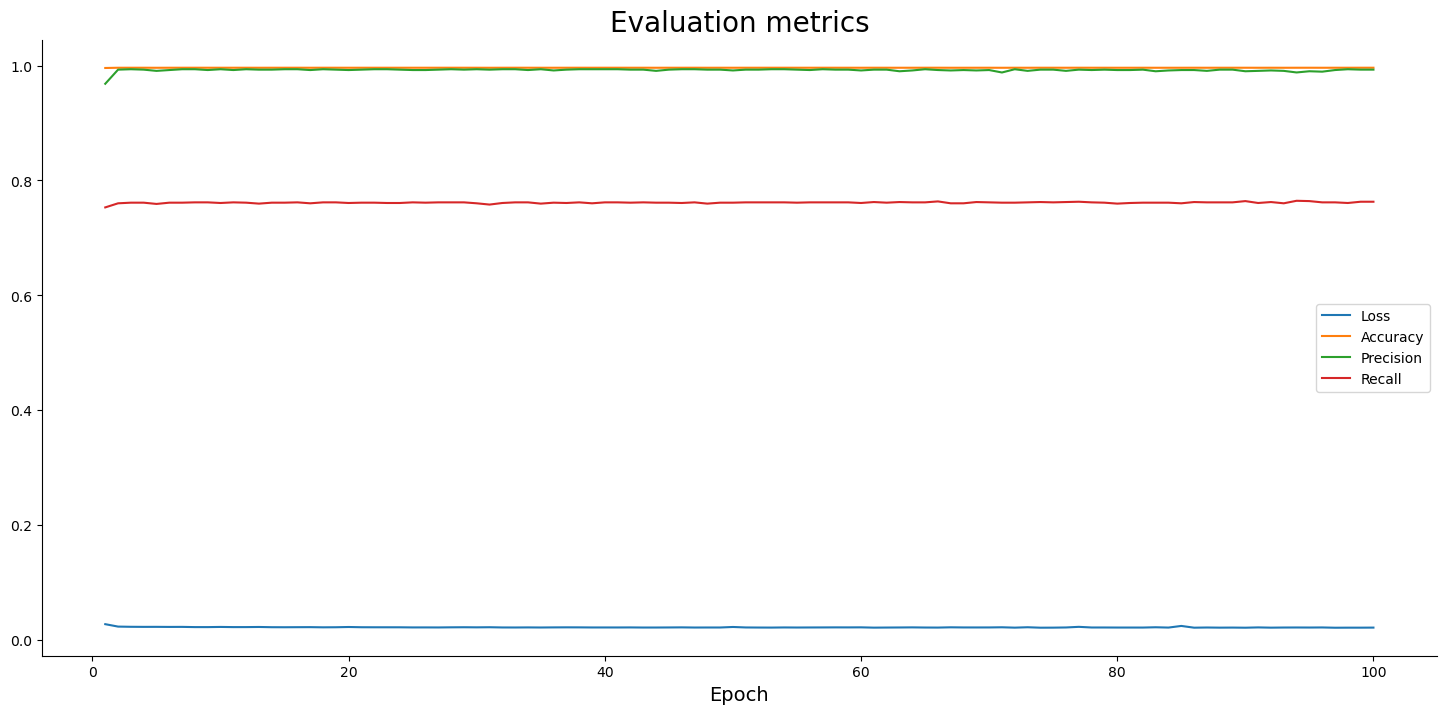

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [12]:
predictions = model.predict(X_test_scaled)
predictions

640/640 [==============================] - 1s 1ms/step


array([[0.00404321],
       [0.0012473 ],
       [0.00106601],
       ...,
       [0.00733512],
       [0.00090174],
       [0.00113501]], dtype=float32)

ROC_AUC Score :  0.9445535864334276
Function for ROC_AUC Score :  0.9445535864334276
Threshold value is: 0.017246729


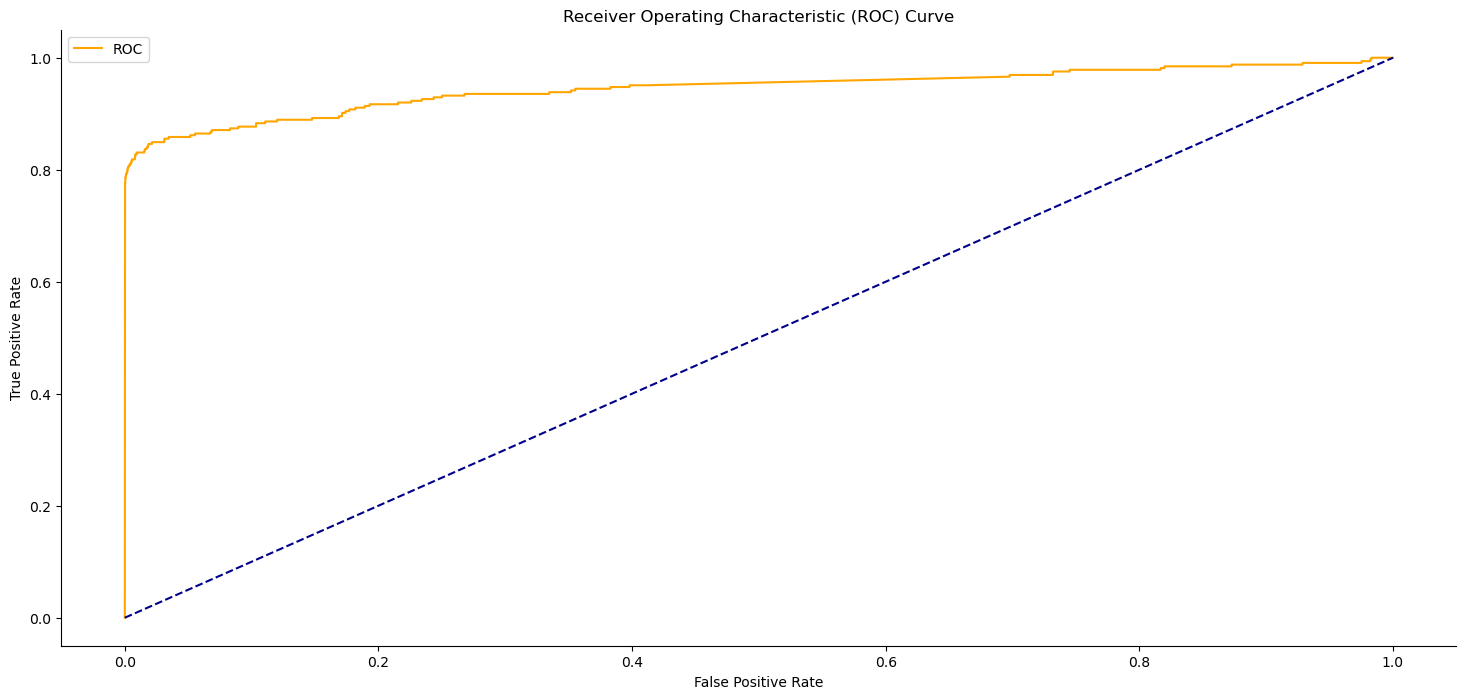

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(y_test, predictions)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [14]:
prediction_classes = [
    1 if prob > optimal_threshold else 0 for prob in np.ravel(predictions)
]


In [15]:
prediction_classes[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_classes))

[[19708   432]
 [   50   275]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.98
Precision: 0.39
Recall: 0.85


In [18]:
sub2 = pd.DataFrame(prediction_classes)

In [19]:
len(sub2)

20465

In [20]:
sub2.to_csv('/kaggle/working/sub2.csv')

In [21]:
#### PRedictions 2

pred2 = model.predict(X_test_scaled_actual)

2843/2843 [==============================] - 4s 1ms/step


In [22]:
pred2

array([[0.0020853 ],
       [0.00077217],
       [0.00080673],
       ...,
       [0.00267908],
       [0.0012473 ],
       [0.00088435]], dtype=float32)

ROC_AUC Score :  0.9445535864334276
Threshold value is: 0.017246729


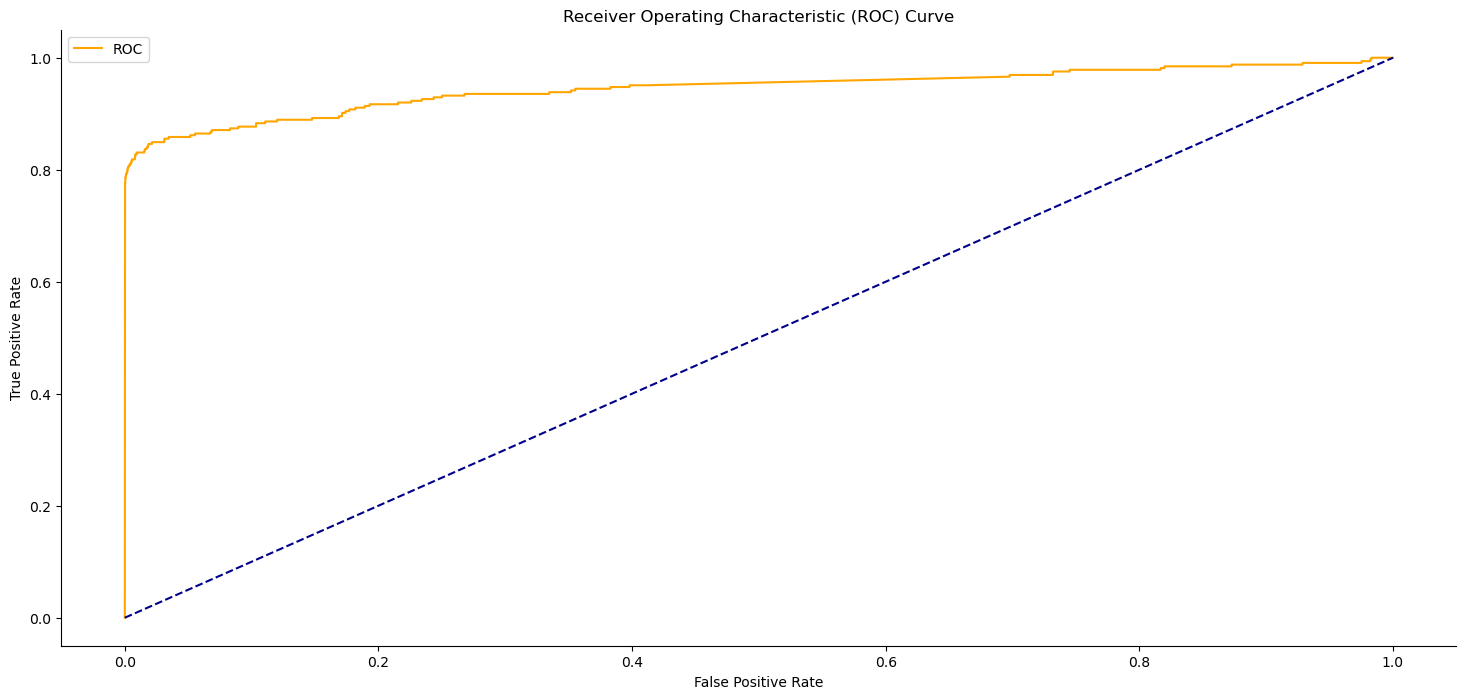

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
#print("Function for ROC_AUC Score : ",roc_auc_score(y_test, pred2)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [24]:
prediction_classes2 = [
    1 if prob > optimal_threshold else 0 for prob in np.ravel(pred2)
]

In [25]:
sub3 = pd.DataFrame(prediction_classes2)
sub3.to_csv('/kaggle/working/sub3.csv')